# fMRI analysis with Nistat python package


# Nistats 

"Python module for fast and easy functional MRI statistical analysis.

It leverages Nilearn, Nibabel and other Python libraries from the Python scientific stack like Scipy, Numpy and Pandas.

This work is based on developments initiated in the nipy nipy project. It is made available by a community of people, amongst which the INRIA Parietal Project Team and D’esposito lab at Berkeley."

Source: https://nistats.github.io/


# Data exploration of Cyberball Dataset

![](http://www.english.cam.ac.uk/research/cogblog/wp-content/uploads/2017/10/cyberball.png)

In [16]:
%matplotlib inline

import warnings; warnings.simplefilter('ignore')

In [17]:
#Import required packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from nilearn import plotting
from nistats.first_level_model import FirstLevelModel
from nistats.reporting import plot_design_matrix, plot_contrast_matrix
from IPython.display import Image




In [18]:
#Defining Data Directory
data_dir = '/Volumes/2019/BIDS'

In [19]:
#Task label
task_label = 'CB'
space_name = 'MNI152NLin2009cAsym'

In [20]:
#List of subjects
list_subjects = ['sub-501',
'sub-502',
'sub-503',
'sub-504',
#'sub-505',
'sub-506',
'sub-507',
'sub-508',
'sub-509',
'sub-511',
'sub-512',
'sub-513',
'sub-514',
'sub-515',
'sub-516',
'sub-518',
'sub-519',
'sub-520',
'sub-521',
'sub-523',
'sub-524',
'sub-525',
'sub-526',
'sub-527',
'sub-528',
'sub-529',
'sub-530',
#'sub-531',
'sub-532',
'sub-533',
'sub-534',
'sub-535',
'sub-536',
'sub-537',
#'sub-539',
'sub-540',
'sub-541',
'sub-542',
'sub-543',
'sub-544',
'sub-545',
'sub-546',
'sub-547',
'sub-548',
'sub-549',
'sub-551',
'sub-552',
'sub-553',
'sub-557',
'sub-558',
'sub-559',
'sub-560',
'sub-562',
'sub-563',
'sub-564',
'sub-565',
'sub-567',
'sub-568',
'sub-569',
'sub-570',
'sub-571',
'sub-573',
'sub-574',
'sub-575',
#'sub-701',
'sub-702',
'sub-703',
'sub-705',
'sub-707',
'sub-708',
'sub-709',
'sub-711',
'sub-712',
'sub-713',
'sub-715',
'sub-716',
'sub-717',
'sub-718',
'sub-719',
'sub-720',
'sub-721',
'sub-722',
'sub-723',
'sub-724',
'sub-725',
#'sub-726',
'sub-727',
'sub-728',
'sub-729',
'sub-730',
'sub-732',
'sub-733',
#'sub-734',
'sub-735',
'sub-736',
'sub-737',
'sub-738',
'sub-739']




In [21]:
# Number of subjects
N=len(list_subjects)

In [22]:
# fMRI parameters
t_r=3.0

## Creating `models`



In [23]:
models = []
for i in range(0,N):
    models.append(FirstLevelModel(t_r=t_r,
                                period_cut=128,
                                drift_model=None,
                                hrf_model='spm',
                                smoothing_fwhm=8,
                                subject_label=list_subjects[i][4:7]))

## Creating `models_run_imgs`

In [24]:
models_run_imgs=[]
for sub in list_subjects:
    run_img = [data_dir + '/derivatives/' + sub + '/func/' + sub + "_task-" + task_label + '_space-' + space_name + '_desc-preproc_bold.nii.gz']
    models_run_imgs.append(run_img)

In [25]:
models_run_imgs[0:5]

[['/Volumes/2019/BIDS/derivatives/sub-501/func/sub-501_task-CB_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz'],
 ['/Volumes/2019/BIDS/derivatives/sub-502/func/sub-502_task-CB_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz'],
 ['/Volumes/2019/BIDS/derivatives/sub-503/func/sub-503_task-CB_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz'],
 ['/Volumes/2019/BIDS/derivatives/sub-504/func/sub-504_task-CB_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz'],
 ['/Volumes/2019/BIDS/derivatives/sub-506/func/sub-506_task-CB_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz']]

## Creating `models_events`

In [26]:
models_events = []
event_file = pd.read_table(data_dir + '/task-' + task_label + '_events.tsv')
for sub in list_subjects:
    models_events.append([event_file])

In [27]:
models_events[0][0]

,onset,duration,trial_type
0,0,189,control
1,198,189,inclusion
2,396,60,inclusion
3,456,129,exclusion


## Creating `models_confounds`

In [28]:
models_confounds = []

for sub in list_subjects:
    confound_file = [pd.read_table(data_dir + '/derivatives/' + sub + '/func/' + sub + "_task-" + task_label + '_desc-confounds_regressors.tsv')]
    models_confounds.append(confound_file)
    

In [29]:
for var in enumerate(models_confounds[0][0].columns):
    print(var)

(0, 'csf')
(1, 'csf_derivative1')
(2, 'csf_derivative1_power2')
(3, 'csf_power2')
(4, 'white_matter')
(5, 'white_matter_derivative1')
(6, 'white_matter_power2')
(7, 'white_matter_derivative1_power2')
(8, 'global_signal')
(9, 'global_signal_derivative1')
(10, 'global_signal_derivative1_power2')
(11, 'global_signal_power2')
(12, 'std_dvars')
(13, 'dvars')
(14, 'framewise_displacement')
(15, 't_comp_cor_00')
(16, 't_comp_cor_01')
(17, 't_comp_cor_02')
(18, 't_comp_cor_03')
(19, 'a_comp_cor_00')
(20, 'a_comp_cor_01')
(21, 'a_comp_cor_02')
(22, 'a_comp_cor_03')
(23, 'a_comp_cor_04')
(24, 'a_comp_cor_05')
(25, 'a_comp_cor_06')
(26, 'a_comp_cor_07')
(27, 'a_comp_cor_08')
(28, 'a_comp_cor_09')
(29, 'a_comp_cor_10')
(30, 'a_comp_cor_11')
(31, 'a_comp_cor_12')
(32, 'a_comp_cor_13')
(33, 'a_comp_cor_14')
(34, 'a_comp_cor_15')
(35, 'a_comp_cor_16')
(36, 'a_comp_cor_17')
(37, 'a_comp_cor_18')
(38, 'a_comp_cor_19')
(39, 'a_comp_cor_20')
(40, 'a_comp_cor_21')
(41, 'a_comp_cor_22')
(42, 'a_comp_cor_23

## Running a basic model

In [30]:
first_level_model_fit_list = []
design_matrices = []

for index, mod in enumerate(models):
    fit = mod.fit(models_run_imgs[index][0], events=models_events[index][0])
    first_level_model_fit_list.append(fit)
    dmat = fit.design_matrices_[0]
    design_matrices.append(dmat)

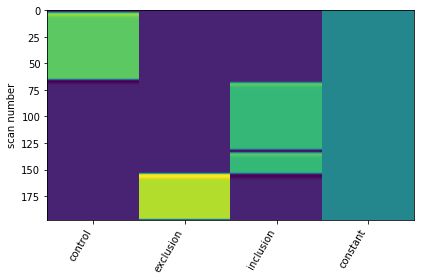

In [31]:
plot_design_matrix(design_matrices[0])
plt.show()

# Creating contrasts

In [32]:
def make_localizer_contrasts(design_matrix):
    """ returns a dictionary of four contrasts, given the design matrix"""

    # first generate canonical contrasts 
    contrast_matrix = np.eye(design_matrix.shape[1])
    contrasts = dict([(column, contrast_matrix[i])
                      for i, column in enumerate(design_matrix.columns)])

    # Add more complex contrasts
    contrasts['Inclusion-Control'] = (contrasts['inclusion'] - contrasts['control'])
    contrasts['Exclusion-Control'] = (contrasts['exclusion'] - contrasts['control'])
    contrasts['Exclusion-Inclusion'] = (contrasts['exclusion'] - contrasts['inclusion'])
    
    contrasts = {
        'Inclusion-Control' : contrasts['Inclusion-Control'],
        'Exclusion-Control': contrasts['Exclusion-Control'],
        'Exclusion-Inclusion': contrasts['Exclusion-Inclusion']
    }
    return contrasts

In [33]:
contrasts = make_localizer_contrasts(design_matrices[0])

In [34]:
contrasts

{'Inclusion-Control': array([-1.,  0.,  1.,  0.]),
 'Exclusion-Control': array([-1.,  1.,  0.,  0.]),
 'Exclusion-Inclusion': array([ 0.,  1., -1.,  0.])}

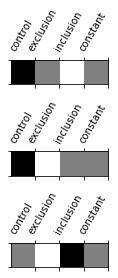

In [35]:
plt.figure(figsize=(5, 9))
for i, (key, values) in enumerate(contrasts.items()):
    ax = plt.subplot(7, 1, i + 1)
    plot_contrast_matrix(values, design_matrix=design_matrices[0], ax=ax)

plt.show()

In [36]:
def plot_contrast(first_level_model):
    """ Given a first model, specify, enstimate and plot the main contrasts"""
    design_matrix = first_level_model.design_matrices_[0]
    # Call the contrast specification within the function
    contrasts = make_localizer_contrasts(design_matrix)
    fig = plt.figure(figsize=(9, 20))
    # compute the per-contrast z-map
    for index, (contrast_id, contrast_val) in enumerate(contrasts.items()):
        ax = plt.subplot(len(contrasts), 1, 1 + index)
        z_map = first_level_model.compute_contrast(
            contrast_val, output_type='z_score')
        plotting.plot_stat_map(
            z_map, display_mode='ortho', threshold=3.0, title=contrast_id, axes=ax)

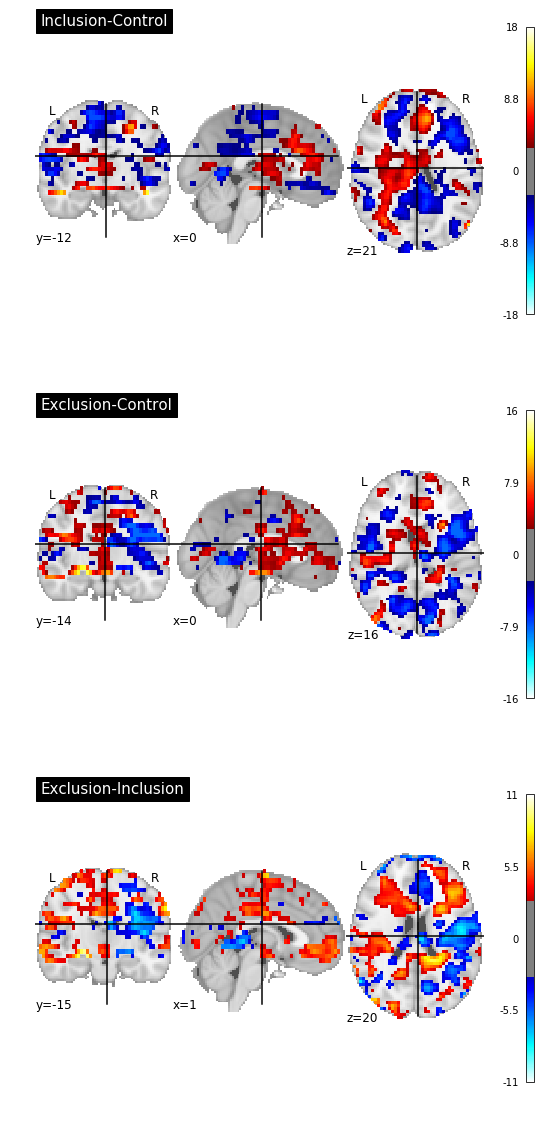

In [37]:
plot_contrast(first_level_model_fit_list[0])
plt.show()

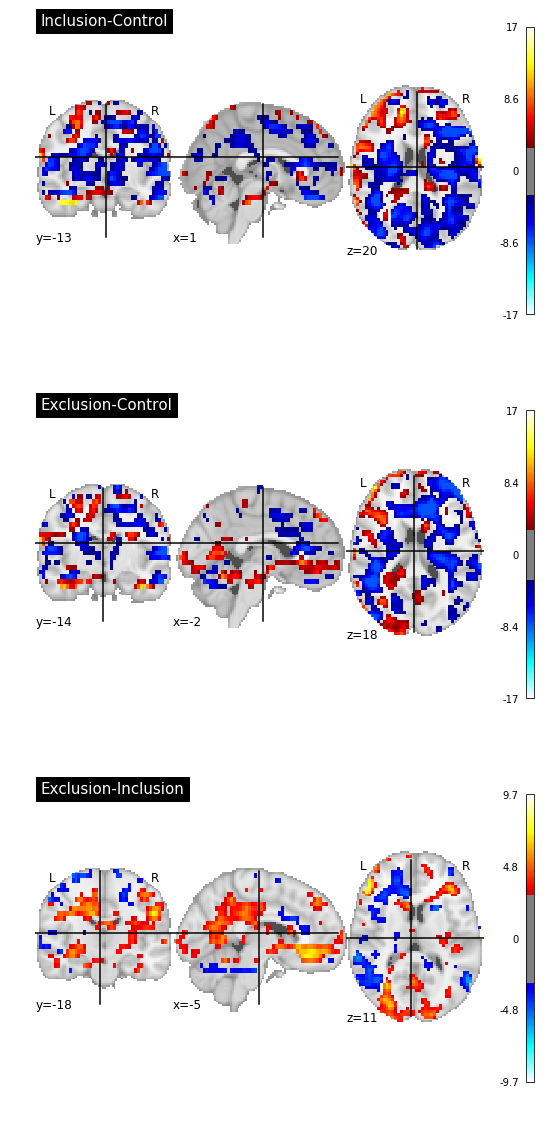

In [38]:
plot_contrast(first_level_model_fit_list[1])
plt.show()

In [39]:
def plot_contrast_glass(first_level_model):
    """ Given a first model, specify, enstimate and plot the main contrasts"""
    design_matrix = first_level_model.design_matrices_[0]
    # Call the contrast specification within the function
    contrasts = make_localizer_contrasts(design_matrix)
    fig = plt.figure(figsize=(9, 20))
    # compute the per-contrast z-map
    for index, (contrast_id, contrast_val) in enumerate(contrasts.items()):
        ax = plt.subplot(len(contrasts), 1, 1 + index)
        z_map = first_level_model.compute_contrast(
            contrast_val, output_type='z_score')
        plotting.plot_glass_brain(
            z_map, display_mode='ortho',colorbar=True, threshold=6.0, title=contrast_id, axes=ax)

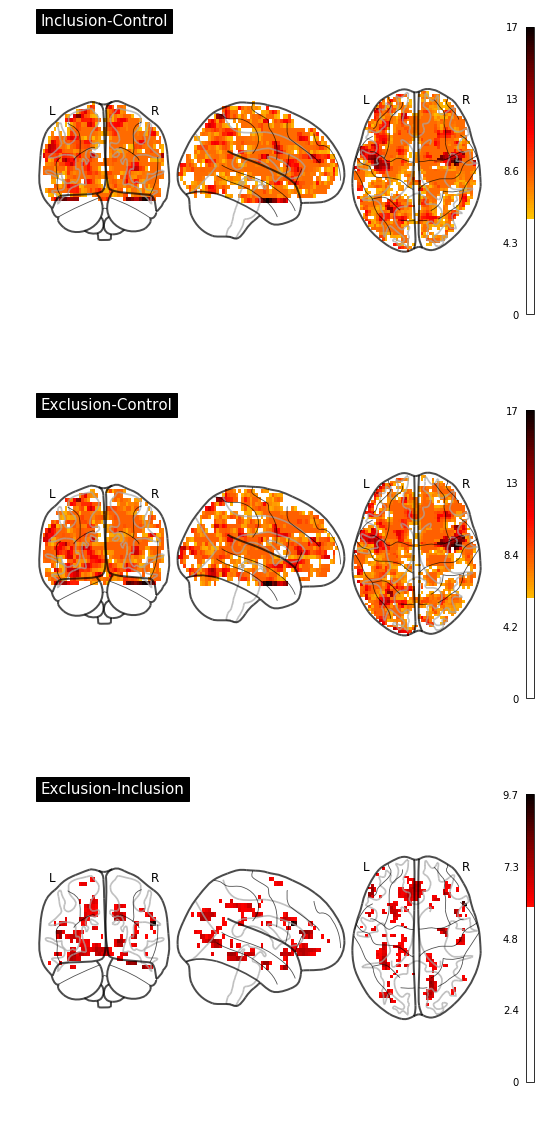

In [40]:
plot_contrast_glass(first_level_model_fit_list[1])
plt.show()

## Saving our first-level contrasts map

In [41]:
# Create a function that saves the contrast maps of interest

output_dir = '/Volumes/2019/BIDS/derivatives/results/func/CB/'

def save_contrast(first_level_model):
    """ Given a first model, specify, estimate and save the main contrasts"""
    design_matrix = first_level_model.design_matrices_[0]
    # Call the contrast specification within the function
    contrasts = make_localizer_contrasts(design_matrix)
    # compute the per-contrast z-map
    for index, (contrast_id, contrast_val) in enumerate(contrasts.items()):
        z_map = first_level_model.compute_contrast(
            contrast_val, output_type='z_score')
        filename =output_dir + 'sub-' + first_level_model.subject_label + '_contrast-' + contrast_id + '_model-' + 'simple' + '_zmap.nii.gz'
        z_map.to_filename(filename)


In [42]:
for model in first_level_model_fit_list:
    save_contrast(model)

## Creating the Design Matrix for second level

In [ ]:
#Phenotype file
phenotype_file = data_dir + '/phenotype.tsv'
phenotype = pd.read_table(phenotype_file)

In [ ]:
phenotype.columns = ['subject_label', 'group', 'sex', 'age', 'suicide',
       'depression', 'BDI_Total', 'SBQ_Total', 'CTQ_PhysAbuse',
       'CTQ_PhysNeglect', 'CTQ_EmoAbuse', 'CTQ_EmoNeglect', 'CTQ_SexAbuse',
       'CTQ_Total', 'IQ_Total', 'BIS_Total', 'BIS_NonPlanning', 'BIS_Motor',
       'BIS_Attentional', 'FACES_BALANCEDCOHESION',
       'FACES_BALANCEDFLEXIBILITY', 'FACES_DISENGAGED', 'FACES_ENMESHED',
       'FACES_RIGID', 'FACES_CHAOTIC', 'FACES_FAMILYCOMMUNICATIONSCORE',
       'FACES_FAMILYSATISFACTIONSCORE', 'FACES_COHESIONRATIO',
       'FACES_FLEXIBILITYRATIO', 'FACES_TOTALCIRCUMPLEXRATIO']


In [ ]:
#Rounding age to years

phenotype = phenotype.round({"age":0}) 

In [ ]:
#select rows of participants included
phenotype.set_index('subject_label', drop=False, append=False, inplace=True, verify_integrity=False)

In [ ]:
phenotype_subj = phenotype.loc[list_subjects,:]

In [ ]:
phenotype_subj_select = phenotype_subj.loc[:,['subject_label','sex','age','depression']]

In [ ]:
phenotype_subj.head()